In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


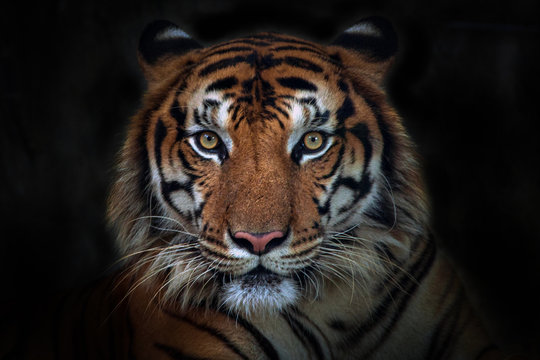

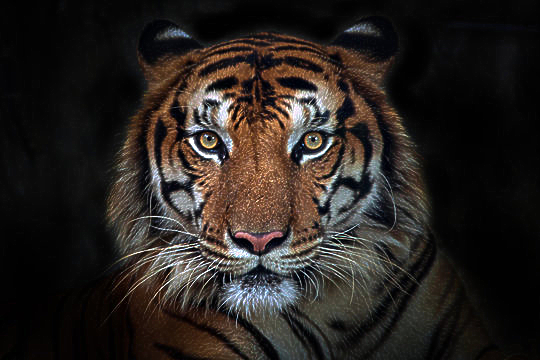

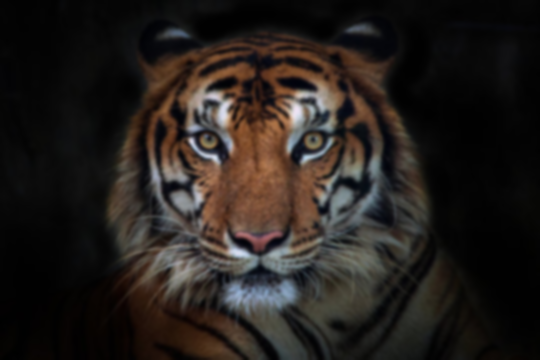

In [ ]:


def sharpen_image(image, kernel_size=(7, 7), gamma=2):
    # 1. Apply Gaussian Blur (smoothing filter)
    blur = cv2.GaussianBlur(image, kernel_size, 0)

    # 2. Calculate the difference between original and blurred
    detail = cv2.subtract(image, blur)

    # 3. Apply gamma factor
    sharpened_detail = cv2.addWeighted(detail, gamma, np.zeros_like(detail), 0, 0)

    # 4. Add sharpened detail back to the original image
    sharpened = cv2.add(image, sharpened_detail)

    return sharpened, blur


image = cv2.imread('tiger.jpg')
if image is not None:
    sharpened_img, blur = sharpen_image(image)
    cv2_imshow(image)
    cv2_imshow(sharpened_img)
    cv2_imshow(blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Could not load image.")


### Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


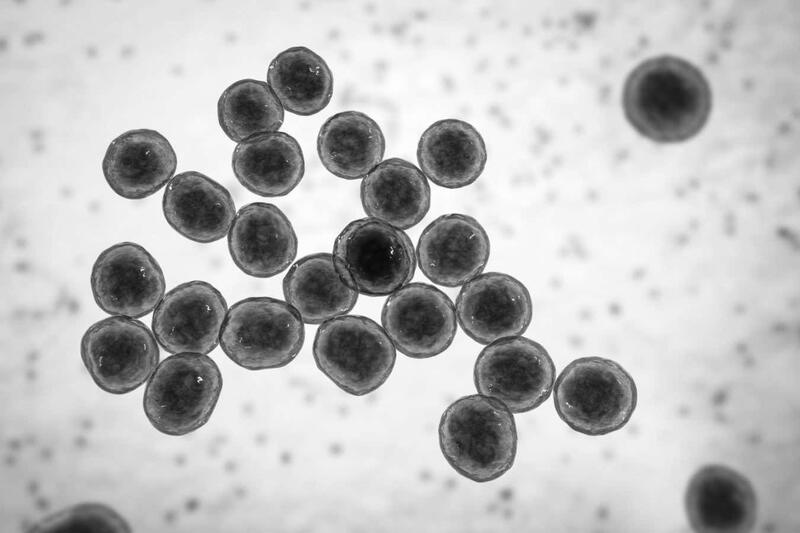

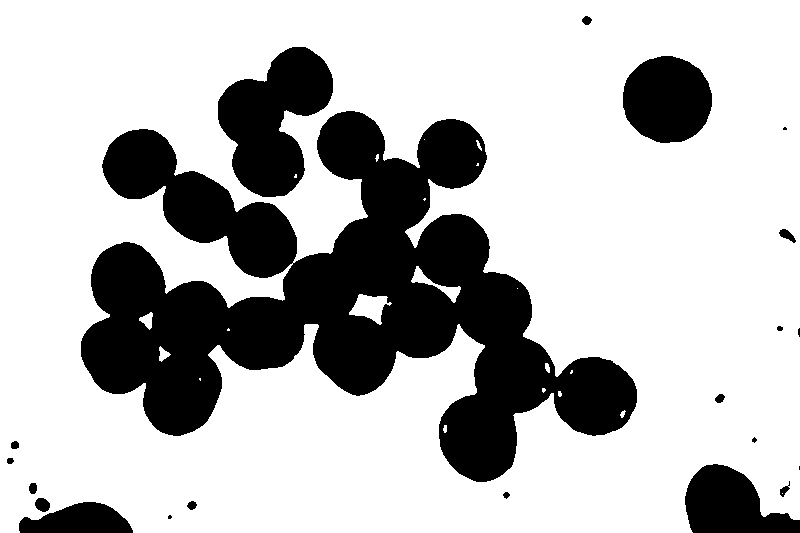

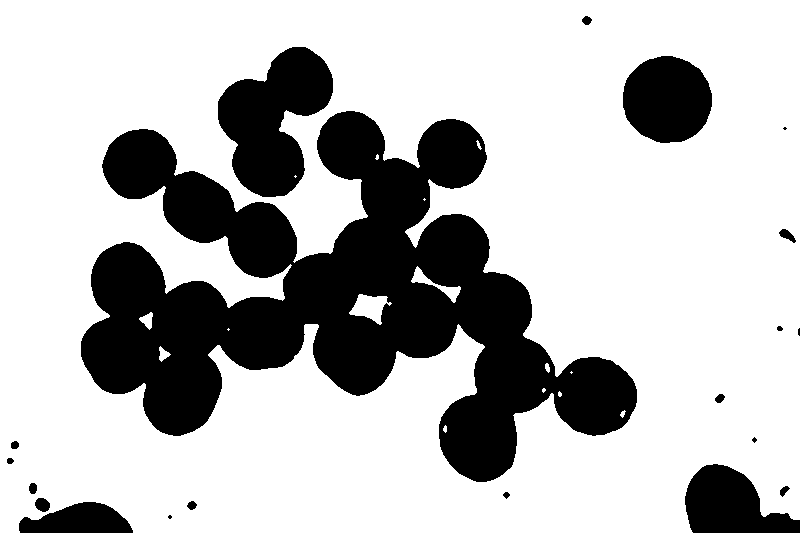

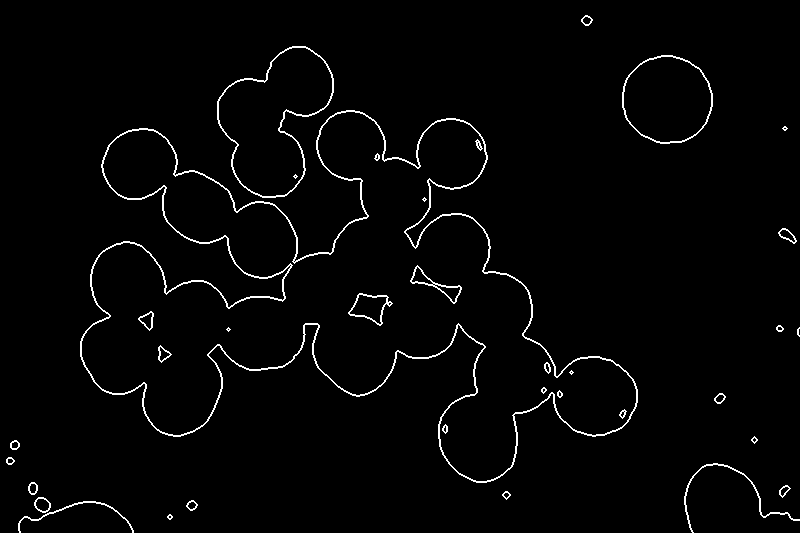

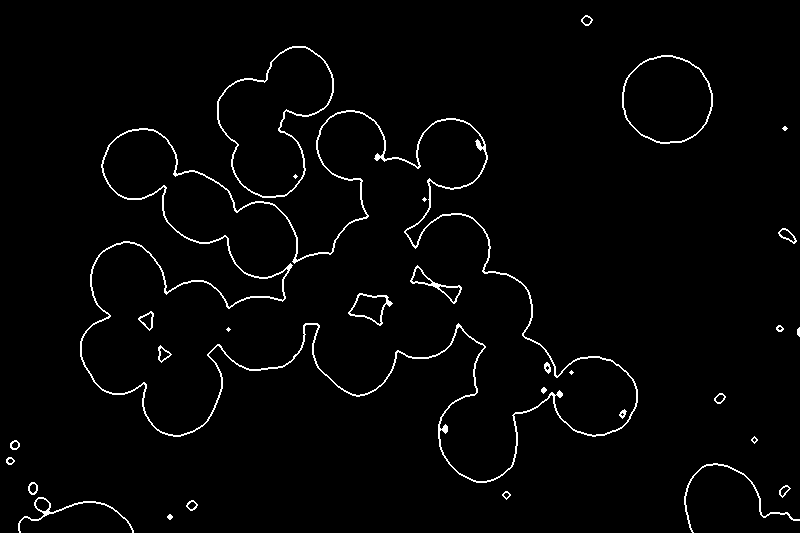

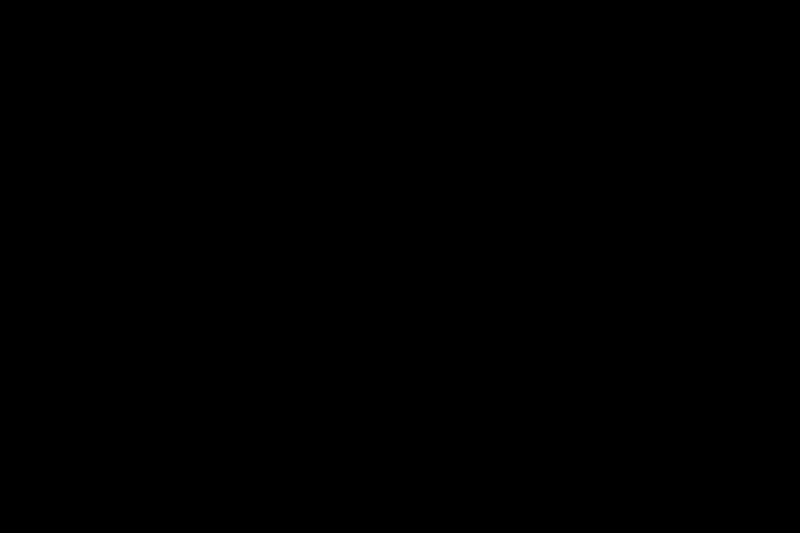

In [ ]:
 def morph_edges_clean(
    img_path="bacteria.jpg",
    median_ksize=5,
    open_ksize=3,
    close_ksize=3,
    gradient_ksize=3,
    min_edge_area=80
):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Could not read: {img_path}")

    denoised = cv2.medianBlur(img, median_ksize)

    _, binary = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    k_open  = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (open_ksize, open_ksize))
    k_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (close_ksize, close_ksize))
    clean = cv2.morphologyEx(binary, cv2.MORPH_OPEN,  k_open,  iterations=1)
    clean = cv2.morphologyEx(clean,  cv2.MORPH_CLOSE, k_close, iterations=1)

    k_grad = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (gradient_ksize, gradient_ksize))
    dilated = cv2.dilate(clean, k_grad, iterations=1)
    eroded  = cv2.erode(clean,  k_grad, iterations=1)
    edges_raw = cv2.subtract(dilated, eroded)


    edges_clean = cv2.morphologyEx(edges_raw, cv2.MORPH_CLOSE, k_close, iterations=1)
    thin_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    edges_thin = cv2.erode(edges_clean, thin_kernel, iterations=1)

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(edges_thin, connectivity=8)
    edges_final = np.zeros_like(edges_thin)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_edge_area:
            edges_final[labels == i] = 255

    results = {
        "gray": img,
        "denoised": denoised,
        "binary": binary,
        "clean_mask": clean,
        "edges_raw": edges_raw,
        "edges_clean": edges_clean,
        "edges_final": edges_final
    }
    return results


res = morph_edges_clean(
    img_path="bacteria.jpg",
    median_ksize=5,
    open_ksize=3,
    close_ksize=3,
    gradient_ksize=3,
    min_edge_area=80
)

cv2_imshow(res["gray"])
cv2_imshow(res["binary"])
cv2_imshow(res["clean_mask"])
cv2_imshow(res["edges_raw"])
cv2_imshow(res["edges_clean"])
cv2_imshow(res["edges_final"])
cv2.waitKey(0)
cv2.destroyAllWindows()




```
`# This is formatted as code`
```

# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

Bacteria count : 26


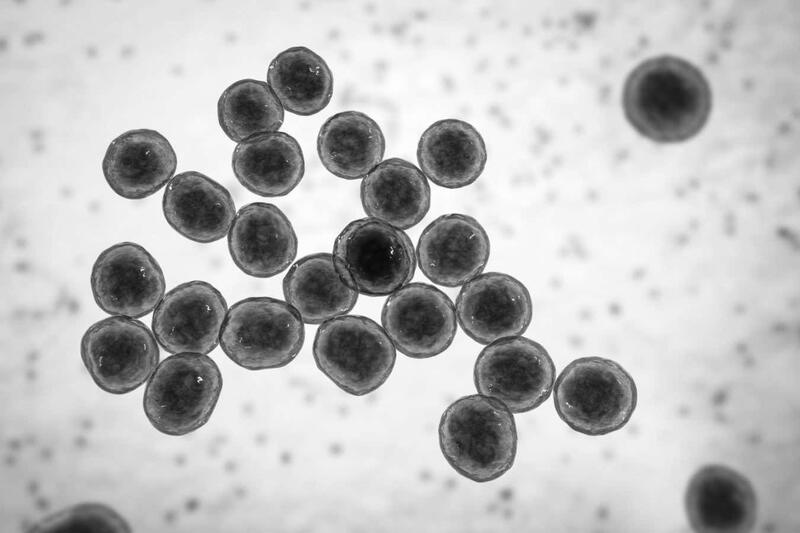

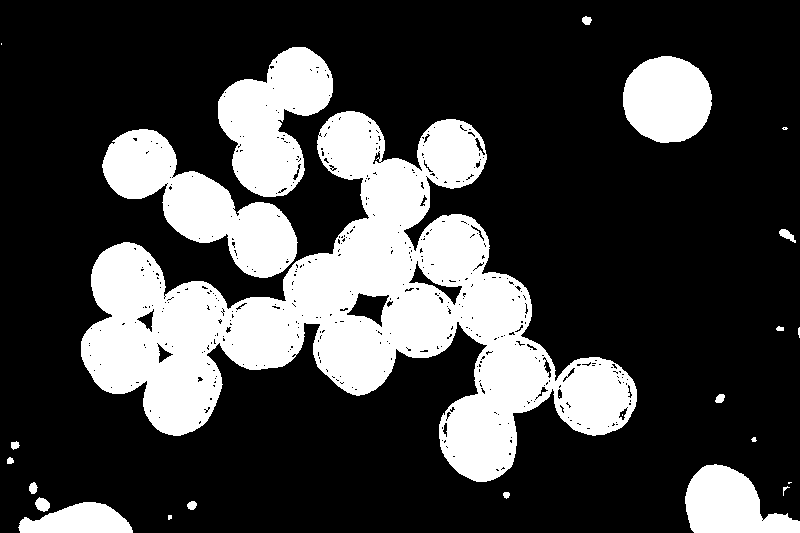

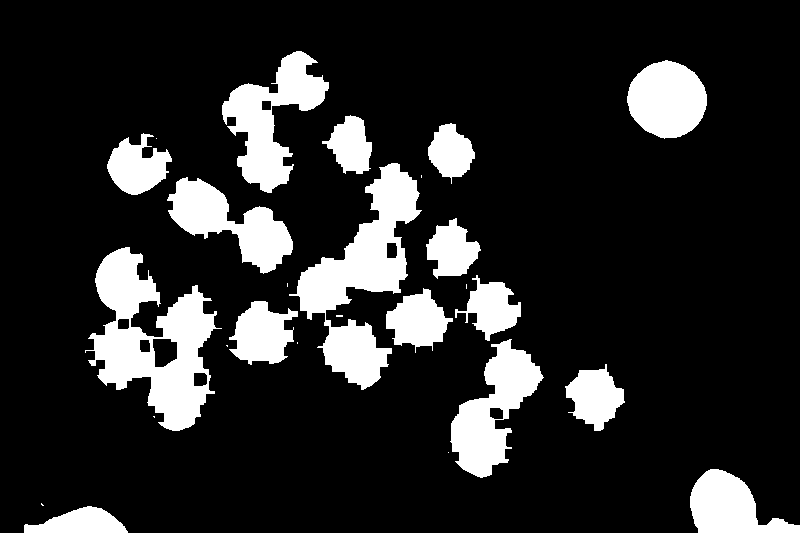

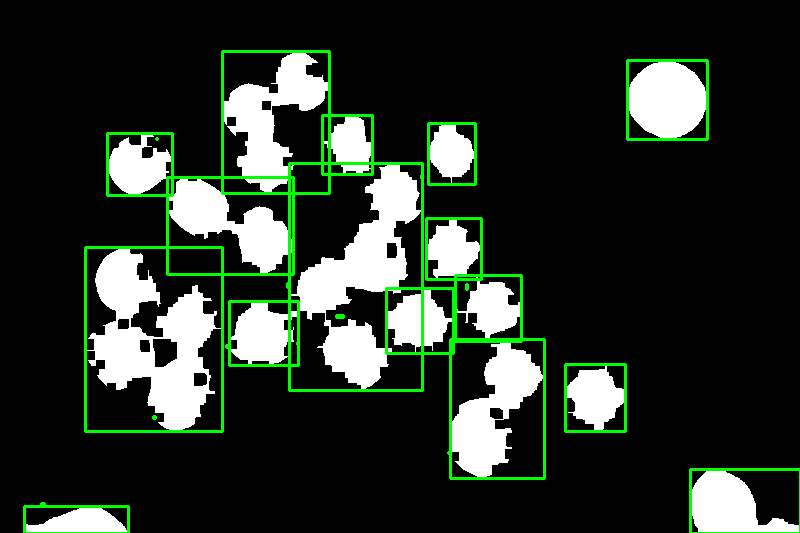

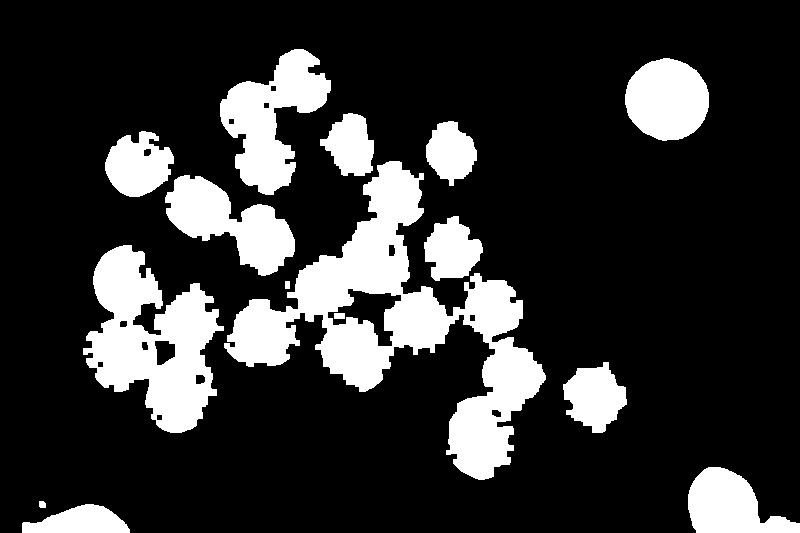

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image (grayscale)
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)

# Otsu thresholding
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = cv2.bitwise_not(binary)

# TODO: Erosion to remove small noise
kernel = np.ones((3, 3), np.uint8)
eroded_img = cv2.erode(binary, kernel, iterations=4)

# TODO: Connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(eroded_img, 8, cv2.CV_32S)

# TODO: print the number of components
bacteria_count = num_labels - 1
print(f"Bacteria count : {bacteria_count}")

# TODO: Draw results (Boxes)
output_img = cv2.cvtColor(eroded_img, cv2.COLOR_GRAY2BGR)
reconstructed_img = cv2.dilate(eroded_img, kernel, iterations=2)
reconstructed_img_rgb = cv2.cvtColor(reconstructed_img, cv2.COLOR_GRAY2BGR)

for i in range(1, num_labels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# -----------------
# TODO: Display
cv2_imshow(img)
cv2_imshow(binary)
cv2_imshow(eroded_img)
cv2_imshow(output_img)
cv2_imshow(reconstructed_img_rgb)



# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge